# Polls Dataset
Download data from [https://github.com/fivethirtyeight/data/tree/master/polls](https://github.com/fivethirtyeight/data/tree/master/polls) and place in `"../data/"`

In [1]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
df = pd.read_csv(os.path.join("..","data","polls","president_primary_polls.csv"))
print(json.dumps(list(df.columns), indent=1))
df.head()

[
 "question_id",
 "poll_id",
 "cycle",
 "state",
 "pollster_id",
 "pollster",
 "sponsor_ids",
 "sponsors",
 "display_name",
 "pollster_rating_id",
 "pollster_rating_name",
 "fte_grade",
 "sample_size",
 "population",
 "population_full",
 "methodology",
 "office_type",
 "start_date",
 "end_date",
 "sponsor_candidate",
 "internal",
 "partisan",
 "tracking",
 "nationwide_batch",
 "created_at",
 "notes",
 "url",
 "stage",
 "party",
 "answer",
 "candidate_name",
 "pct"
]


,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_name,pct
0,94633,58150,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,False,5/28/19 21:59,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,Joseph R. Biden Jr.,38.0
1,94633,58150,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,False,5/28/19 21:59,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,Bernard Sanders,20.0
2,94633,58150,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,False,5/28/19 21:59,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Warren,Elizabeth Warren,9.0
3,94633,58150,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,False,5/28/19 21:59,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Buttigieg,Pete Buttigieg,7.0
4,94633,58150,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,False,5/28/19 21:59,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Harris,Kamala D. Harris,7.0


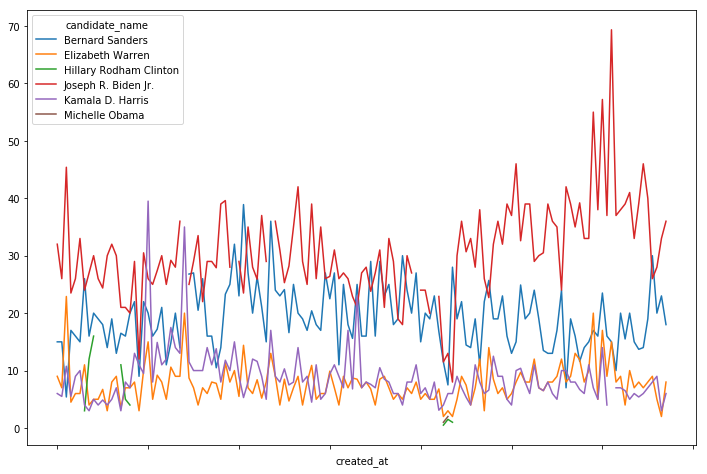

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
results = df.loc[df["cycle"]==2020]
results = results.loc[df["stage"]=="primary"]
results = results.loc[df["party"]=="DEM"]
results = results.groupby(by=["candidate_name","created_at"])["pct"].mean()
results = results.unstack(level="candidate_name")
mask = results.mean(axis=0)>7.0
results = results.loc[:, mask]
results.plot(ax=ax)